### Import Qcnn and templates.

In [1]:
# You don't need the templates imported here (classes
# starting with `Conv` and `Pool`), but only the `Qcnn`
# class. I decided to include the templates just so you
# could get to know them.
from qdna.ansatz import (
    Qcnn,
    ConvDefault,
    ConvSimple,
    ConvU4,
    ConvU4UpToDiagonal,
    PoolDefault,
    PoolSimple
)

### Create custom templates.

In [2]:
# You can define custom templates for the Convolutional and
# Pooling layers.

import numpy as np
from qiskit import QuantumCircuit
from qdna.ansatz.qcnn import BlockTemplate

# Convolutional layer template
class ConvIsing(BlockTemplate):
    @property
    def num_parameters(self) -> int:
        return 2

    @staticmethod
    def circuit(params):
        target = QuantumCircuit(2)

        target.h(0)
        target.h(1)

        target.rz(params[0], 0)
        target.rz(params[1], 1)

        target.rzz(0.5*(np.pi-params[0])*(np.pi-params[1]), 0, 1)

        return target

# Pooling layer template
class PoolRzRx(BlockTemplate):
    @property
    def num_parameters(self) -> int:
        return 4

    @staticmethod
    def circuit(params):
        target = QuantumCircuit(2)

        target.cry(params[0], 0, 1)
        target.crx(params[1], 0, 1)
        target.cry(params[2], 0, 1, ctrl_state='0')
        target.crx(params[3], 0, 1, ctrl_state='0')

        return target


### Create ansatz.

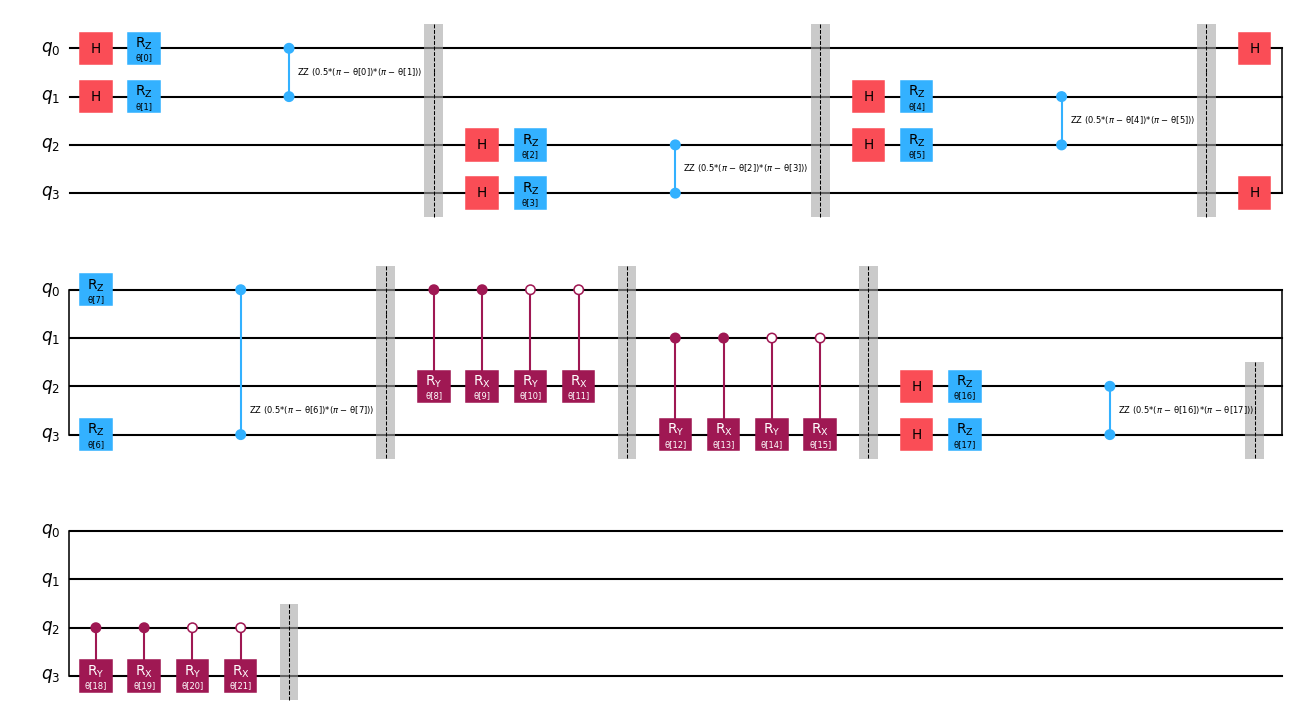

In [3]:
# Here I create the ansatz and print the circuit. You
# can combine the ansatz with any embedding. I will show
# you how to do this next.
num_qubits = 4

ansatz = Qcnn(num_qubits, conv_block=ConvIsing(), pool_block=PoolRzRx(), insert_barriers=True)
ansatz.decompose(reps=2).draw('mpl', style="iqp", scale=0.75)

### Create an embedding.

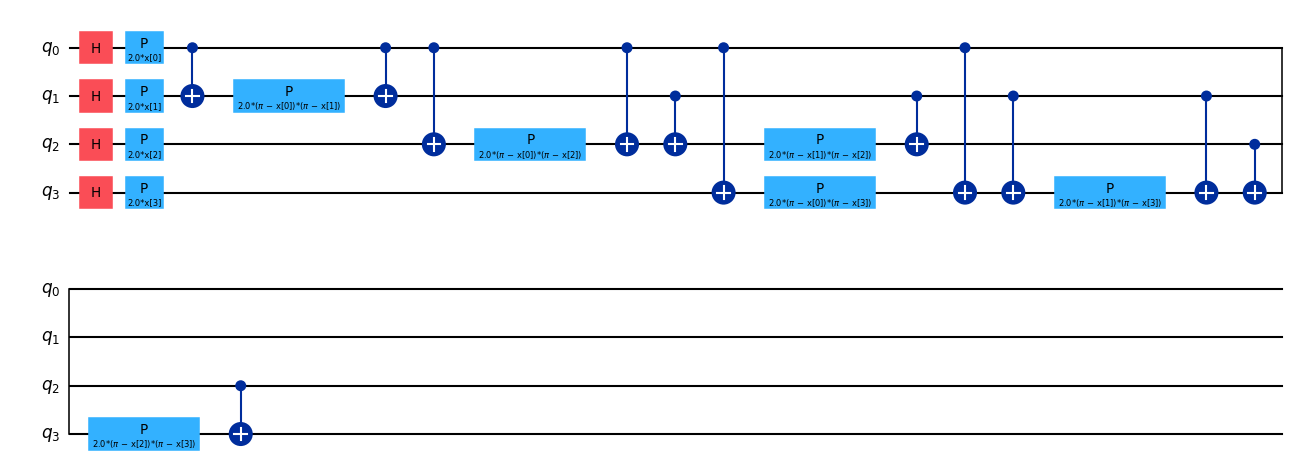

In [4]:
# This is the embedding that will be combined with ansatz.
from qiskit.circuit.library import ZZFeatureMap

embedding = ZZFeatureMap(num_qubits, reps=1)
embedding.decompose(reps=1).draw('mpl', style="iqp", scale=0.75)

### Combine the embedding with the ansatz.

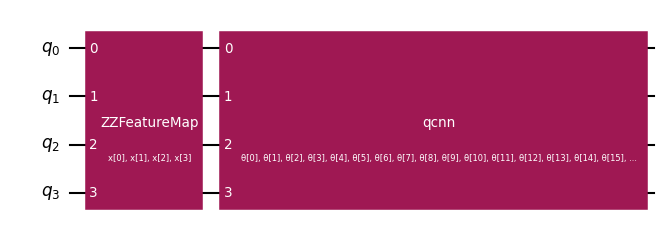

In [5]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(num_qubits)
circuit.compose(embedding, inplace=True)
circuit.compose(ansatz, inplace=True)

circuit.draw('mpl', style="iqp", scale=0.75)